In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
kid = pd.read_csv('C:\\Users\\sh921\\Dropbox\\Changwon-bigdata\\교통사고 데이터\\changwon_accident_kid_analysis.csv')

In [11]:
kid.head()

,index,year,month,day,time,weekday,gun,dong,사망자수,중상자수,경상자수,부상신고자수,기상상태,가해운전자 차종
0,1,2012,1,10,20,화,마산회원구,내서읍,0,0,1,0,맑음,기타불명
1,2,2012,1,12,18,목,진해구,태평동,0,1,0,0,맑음,승용
2,3,2012,1,19,12,목,진해구,여좌동,0,1,0,0,비,승용
3,4,2012,1,20,17,금,성산구,반림동,0,1,0,0,맑음,화물
4,5,2012,1,22,15,일,의창구,소계동,0,1,0,0,흐림,승용


In [12]:
kid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     823 non-null    int64 
 1   year      823 non-null    int64 
 2   month     823 non-null    int64 
 3   day       823 non-null    int64 
 4   time      823 non-null    int64 
 5   weekday   823 non-null    object
 6   gun       823 non-null    object
 7   dong      823 non-null    object
 8   사망자수      823 non-null    int64 
 9   중상자수      823 non-null    int64 
 10  경상자수      823 non-null    int64 
 11  부상신고자수    823 non-null    int64 
 12  기상상태      823 non-null    object
 13  가해운전자 차종  823 non-null    object
dtypes: int64(9), object(5)
memory usage: 90.1+ KB
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\sh921\anaconda3

  added / updated specs:
    - shapely


The following packages will be downloaded:

    package                    |        

# 요일변수, 주말변수 만들기

In [15]:
def is_weekday(x):
    if x == '월': 
        return 0
    elif x =='화':
        return 1
    elif x =='수':
        return 2
    elif x =='목':
        return 3
    elif x =='금':
        return 4
    elif x =='토':
        return 5
    else:
        return 6 
    
kid['weekday'] = kid['weekday'].apply(is_weekday) 

In [16]:
def is_weekend(x):
    if x ==5: #토요일
        return 1
    elif x ==6: #일요일
        return 1
    else:
        return 0
    
#weekday 변수에 is_weekend 함수를 적용하여 'weekend' 변수 생성
kid['weekend'] = kid['weekday'].apply(is_weekend)

In [18]:
kid[['weekend','weekday']].head()

,weekend,weekday
0,0,1
1,0,3
2,0,3
3,0,4
4,1,6


# 기상변수 만들기

In [24]:
kid = kid.rename(columns={'기상상태':'weather'})

In [25]:
kid = pd.get_dummies(kid, columns =['weather'])

In [27]:
kid = kid.rename(columns={'weather_기타':'weather_none'})
kid = kid.rename(columns={'weather_맑음':'weather_sun'})
kid = kid.rename(columns={'weather_비':'weather_rain'})
kid = kid.rename(columns={'weather_흐림':'weather_cloud'})

In [29]:
kid['acci_count'] = 1
kid = kid.rename(columns={'사망자수':'dead'})
kid = kid.rename(columns={'중상자수':'dead_1'})
kid = kid.rename(columns={'경상자수':'dead_2'})
kid = kid.rename(columns={'부상신고자수':'dead_3'})

In [31]:
kid = kid.rename(columns={'가해운전자 차종':'car_type'})

In [32]:
kid = pd.get_dummies(kid, columns =['car_type'])

In [34]:
kid = kid.rename(columns={'car_type_건설기계':'car_type1'})
kid = kid.rename(columns={'car_type_기타불명':'car_type2'})
kid = kid.rename(columns={'car_type_승용':'car_type3'})
kid = kid.rename(columns={'car_type_승합':'car_type4'})
kid = kid.rename(columns={'car_type_원동기':'car_type5'})
kid = kid.rename(columns={'car_type_이륜':'car_type6'})
kid = kid.rename(columns={'car_type_자전거':'car_type7'})
kid = kid.rename(columns={'car_type_특수':'car_type8'})
kid = kid.rename(columns={'car_type_화물':'car_type9'})

In [35]:
kid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          823 non-null    int64 
 1   year           823 non-null    int64 
 2   month          823 non-null    int64 
 3   day            823 non-null    int64 
 4   time           823 non-null    int64 
 5   weekday        823 non-null    int64 
 6   gun            823 non-null    object
 7   dong           823 non-null    object
 8   dead           823 non-null    int64 
 9   dead_1         823 non-null    int64 
 10  dead_2         823 non-null    int64 
 11  dead_3         823 non-null    int64 
 12  weekend        823 non-null    int64 
 13  weather_none   823 non-null    uint8 
 14  weather_sun    823 non-null    uint8 
 15  weather_rain   823 non-null    uint8 
 16  weather_cloud  823 non-null    uint8 
 17  acci_count     823 non-null    int64 
 18  KSI            823 non-null   

In [45]:
sum_col = ['dead','dead_1','dead_2','dead_3','acci_count','KSI']
mean_col = ['year','month','day','time','weekday','weekend','weather_none','weather_sun','weather_rain','weather_cloud'
           ,'car_type1','car_type2','car_type3','car_type4','car_type5','car_type6','car_type7','car_type8','car_type9']
kid2 = kid.groupby(['gun','dong'])[sum_col].sum()
kid3 = kid.groupby(['gun','dong'])[mean_col].mean()

In [47]:
kid2 = pd.merge(kid2, kid3, how='left', on=('gun','dong'))

In [48]:
kid2

dead  dead_1  dead_2  dead_3  acci_count  KSI    year  month  \
gun   dong                                                                 
마산합포구 교방동      0       2       3       0           5    2  2015.8  6.200   
      교원동      0       1       1       0           2    1  2012.0  9.000   
      구산면      0       0       2       0           2    0  2016.0  1.000   
      남성동      0       0       2       0           2    0  2016.0  9.000   
      대내동      0       1       0       0           1    1  2013.0  6.000   
...          ...     ...     ...     ...         ...  ...     ...    ...   
진해구   충의동      0       0       0       1           1    0  2020.0  5.000   
      태백동      0       0       1       0           1    0  2013.0  1.000   
      태평동      0       3       6       0           8    3  2016.0  5.375   
      풍호동      0       4       6       0          10    4  2015.5  6.900   
      현동       0       2       0       0           1    2  2019.0  2.000   

             day  time  ...  weather_cloud  car_type1  car_type2  car_type3  \
gun   dong              ...                                                   
마산합포구 교방동   14.0  14.8  ...            0.0        0.0        0.0      1.000   
      교원동   18.0  14.0  ...            0.0        0.0        0.0      1.000   
      구산면   15.0  13.5  ...            0.5        0.0        0.0      1.000   
      남성동    6.5  14.5  ...            0.5        0.0        0.0      0.500   
      대내동   20.0  14.0  ...            0.0        0.0        0.0      1.000   
...          ...   ...  ...            ...        ...        ...        ...   
진해구   충의동   22.0  13.0  ...            0.0        0.0        0.0      1.000   
      태백동    4.0  14.0  ...            0.0        0.0        0.0      1.000   
      태평동   15.5  15.0  ...            0.0        0.0        0.0      0.625   
      풍호동   11.1  15.1  ...            0.0        0.0        0.0      0.900   
      현동    20.0  16.0  ...            0.0        0.0        0.0      1.000   

            car_type4  car_type5  car_type6  car_type7  car_type8  car_type9  
gun   dong                                                                    
마산합포구 교방동         0.0        0.0       0.00        0.0        0.0      0.000  
      교원동         0.0        0.0       0.00        0.0        0.0      0.000  
      구산면         0.0        0.0       0.00        0.0        0.0      0.000  
      남성동         0.0        0.0       0.50        0.0        0.0      0.000  
      대내동         0.0        0.0       0.00        0.0        0.0      0.000  
...               ...        ...        ...        ...        ...        ...  
진해구   충의동         0.0        0.0       0.00        0.0        0.0      0.000  
      태백동         0.0        0.0       0.00        0.0        0.0      0.000  
      태평동         0.0        0.0       0.25        0.0        0.0      0.125  
      풍호동         0.0        0.0       0.00        0.0        0.0      0.100  
      현동          0.0        0.0       0.00        0.0        0.0      0.000  

[113 rows x 25 columns]

In [49]:
kid.to_csv("changwon_accident_kid_0926.csv")

In [50]:
kid2.to_csv("changwon_accident_kid_0926_2.csv")

In [51]:
env = pd.read_csv('C:\\Users\\sh921\\Dropbox\\Changwon-bigdata\\교통사고 데이터\\법정동별_인구_버스.csv')

In [52]:
env.head()

,gun,dong,num_10,num_park,num_ele,num_academ,num_kinder,num_total,num_bus
0,마산합포구,구산면,144,0,3,0,2,4459,105
1,마산합포구,진동면,1487,0,2,30,3,12708,62
2,마산합포구,진북면,97,1,1,0,1,3700,94
3,마산합포구,진전면,79,0,1,1,1,4078,109
4,마산합포구,덕동동,2731,0,1,32,3,14597,51


In [53]:
kid3 = pd.merge(kid2, env,how='left', on=('gun','dong'))

In [54]:
kid3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 112
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gun            113 non-null    object 
 1   dong           113 non-null    object 
 2   dead           113 non-null    int64  
 3   dead_1         113 non-null    int64  
 4   dead_2         113 non-null    int64  
 5   dead_3         113 non-null    int64  
 6   acci_count     113 non-null    int64  
 7   KSI            113 non-null    int64  
 8   year           113 non-null    float64
 9   month          113 non-null    float64
 10  day            113 non-null    float64
 11  time           113 non-null    float64
 12  weekday        113 non-null    float64
 13  weekend        113 non-null    float64
 14  weather_none   113 non-null    float64
 15  weather_sun    113 non-null    float64
 16  weather_rain   113 non-null    float64
 17  weather_cloud  113 non-null    float64
 18  car_type1 

In [55]:
kid3[kid3['num_10'].isnull()]

,gun,dong,dead,dead_1,dead_2,dead_3,acci_count,KSI,year,month,...,car_type7,car_type8,car_type9,num_10,num_park,num_ele,num_academ,num_kinder,num_total,num_bus
11,마산합포구,신월동,0,0,1,0,1,0,2012.000000,3.000000,...,0.0,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,마산합포구,장군동1가,0,0,0,1,1,0,2012.000000,10.000000,...,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,마산합포구,장군동3가,0,1,0,0,1,1,2013.000000,1.000000,...,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,마산합포구,중앙동1가,0,2,0,0,2,2,2016.000000,6.500000,...,0.0,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,마산합포구,중앙동2가,1,0,3,0,4,1,2014.000000,10.250000,...,0.0,0.000000,0.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,마산합포구,중앙동3가,0,3,1,0,4,3,2015.000000,5.250000,...,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,의창구,대원동,0,2,1,1,4,2,2013.750000,8.500000,...,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,의창구,신월동,0,5,5,1,11,5,2015.545455,8.545455,...,0.0,0.090909,0.090909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,의창구,용지동,0,1,0,0,1,1,2012.000000,2.000000,...,0.0,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,의창구,용호동,0,9,5,0,14,9,2014.642857,5.214286,...,0.0,0.000000,0.142857,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
kid3.to_csv('master_0926.csv')

# Master 파일 전처리

- 엑셀에서 na값(행정동 -> 법정동) 찾아서 하나하나 채워넣음

In [319]:
df = pd.read_csv('C:\\Users\\sh921\\Dropbox\\Changwon-bigdata\\교통사고 데이터\\master_0926.csv')
df.head()

,gun,dong,dead,dead_1,dead_2,dead_3,acci_count,KSI,year,month,day,time,weekday,weekend,weather_none,weather_sun,weather_rain,weather_cloud,car_type1,car_type2,car_type3,car_type4,car_type5,car_type6,car_type7,car_type8,car_type9,num_10,num_park,num_ele,num_academ,num_kinder,num_total,num_bus
0,마산합포구,교방동,0,2,3,0,5,2,2015.8,6.2,14.0,14.8,3.8,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2807.0,1.0,1.0,29.0,1.0,14881.0,14.0
1,마산합포구,교원동,0,1,1,0,2,1,2012.0,9.0,18.0,14.0,4.0,0.5,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2807.0,1.0,1.0,29.0,1.0,14881.0,14.0
2,마산합포구,구산면,0,0,2,0,2,0,2016.0,1.0,15.0,13.5,1.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,0.0,3.0,0.0,2.0,4459.0,105.0
3,마산합포구,남성동,0,0,2,0,2,0,2016.0,9.0,6.5,14.5,4.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,2091.0,3.0,1.0,18.0,1.0,20502.0,35.0
4,마산합포구,대내동,0,1,0,0,1,1,2013.0,6.0,20.0,14.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3927.0,1.0,4.0,108.0,4.0,32505.0,34.0


In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gun            90 non-null     object 
 1   dong           90 non-null     object 
 2   dead           90 non-null     int64  
 3   dead_1         90 non-null     int64  
 4   dead_2         90 non-null     int64  
 5   dead_3         90 non-null     int64  
 6   acci_count     90 non-null     int64  
 7   KSI            90 non-null     int64  
 8   year           90 non-null     float64
 9   month          90 non-null     float64
 10  day            90 non-null     float64
 11  time           90 non-null     float64
 12  weekday        90 non-null     float64
 13  weekend        90 non-null     float64
 14  weather_none   90 non-null     float64
 15  weather_sun    90 non-null     float64
 16  weather_rain   90 non-null     float64
 17  weather_cloud  90 non-null     float64
 18  car_type1   

In [321]:
# 사고 경과년도 변수 만들기
df['year_count'] = 2021 - df['year']
df[['year_count']].head()

,year_count
0,5.2
1,9.0
2,5.0
3,5.0
4,8.0


In [322]:
#ARI 변수 만들기
df['ARI_e'] = df['KSI']**2 + df['acci_count']**2
df['ARI_e'].apply(lambda x: math.sqrt(float(x)))

0      5.385165
1      2.236068
2      2.000000
3      2.000000
4      1.414214
        ...    
85    11.180340
86     3.000000
87    30.675723
88     4.472136
89    13.928388
Name: ARI_e, Length: 90, dtype: float64

In [323]:
df['ARI'] = df['ARI_e'] / df['year_count']
df = df.drop(['ARI_e'], axis=1)
df.head()

,gun,dong,dead,dead_1,dead_2,dead_3,acci_count,KSI,year,month,day,time,weekday,weekend,weather_none,weather_sun,weather_rain,weather_cloud,car_type1,car_type2,car_type3,car_type4,car_type5,car_type6,car_type7,car_type8,car_type9,num_10,num_park,num_ele,num_academ,num_kinder,num_total,num_bus,year_count,ARI
0,마산합포구,교방동,0,2,3,0,5,2,2015.8,6.2,14.0,14.8,3.8,0.4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2807.0,1.0,1.0,29.0,1.0,14881.0,14.0,5.2,5.576923
1,마산합포구,교원동,0,1,1,0,2,1,2012.0,9.0,18.0,14.0,4.0,0.5,0.0,0.5,0.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2807.0,1.0,1.0,29.0,1.0,14881.0,14.0,9.0,0.555556
2,마산합포구,구산면,0,0,2,0,2,0,2016.0,1.0,15.0,13.5,1.0,0.0,0.0,0.5,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0,0.0,3.0,0.0,2.0,4459.0,105.0,5.0,0.800000
3,마산합포구,남성동,0,0,2,0,2,0,2016.0,9.0,6.5,14.5,4.0,0.5,0.0,0.5,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.0,0.0,2091.0,3.0,1.0,18.0,1.0,20502.0,35.0,5.0,0.800000
4,마산합포구,대내동,0,1,0,0,1,1,2013.0,6.0,20.0,14.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3927.0,1.0,4.0,108.0,4.0,32505.0,34.0,8.0,0.250000


In [324]:
#10대 주거인구 로그 취하기
df['num_10'] = df['num_10'].apply(lambda x: np.log(x+1))

In [325]:
#전체 주거인구 로그 취하기
df['num_total'] = df['num_total'].apply(lambda x: np.log(x))

In [326]:
df.columns

Index(['gun', 'dong', 'dead', 'dead_1', 'dead_2', 'dead_3', 'acci_count',
       'KSI', 'year', 'month', 'day', 'time', 'weekday', 'weekend',
       'weather_none', 'weather_sun', 'weather_rain', 'weather_cloud',
       'car_type1', 'car_type2', 'car_type3', 'car_type4', 'car_type5',
       'car_type6', 'car_type7', 'car_type8', 'car_type9', 'num_10',
       'num_park', 'num_ele', 'num_academ', 'num_kinder', 'num_total',
       'num_bus', 'year_count', 'ARI'],
      dtype='object')

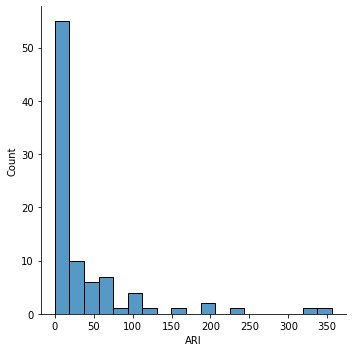

In [327]:
sns.displot(data=df['ARI'])

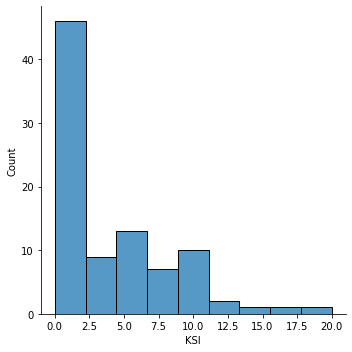

In [328]:
sns.displot(data=df['KSI'])

Text(0.5, 1.0, 'Correlation Matrix')

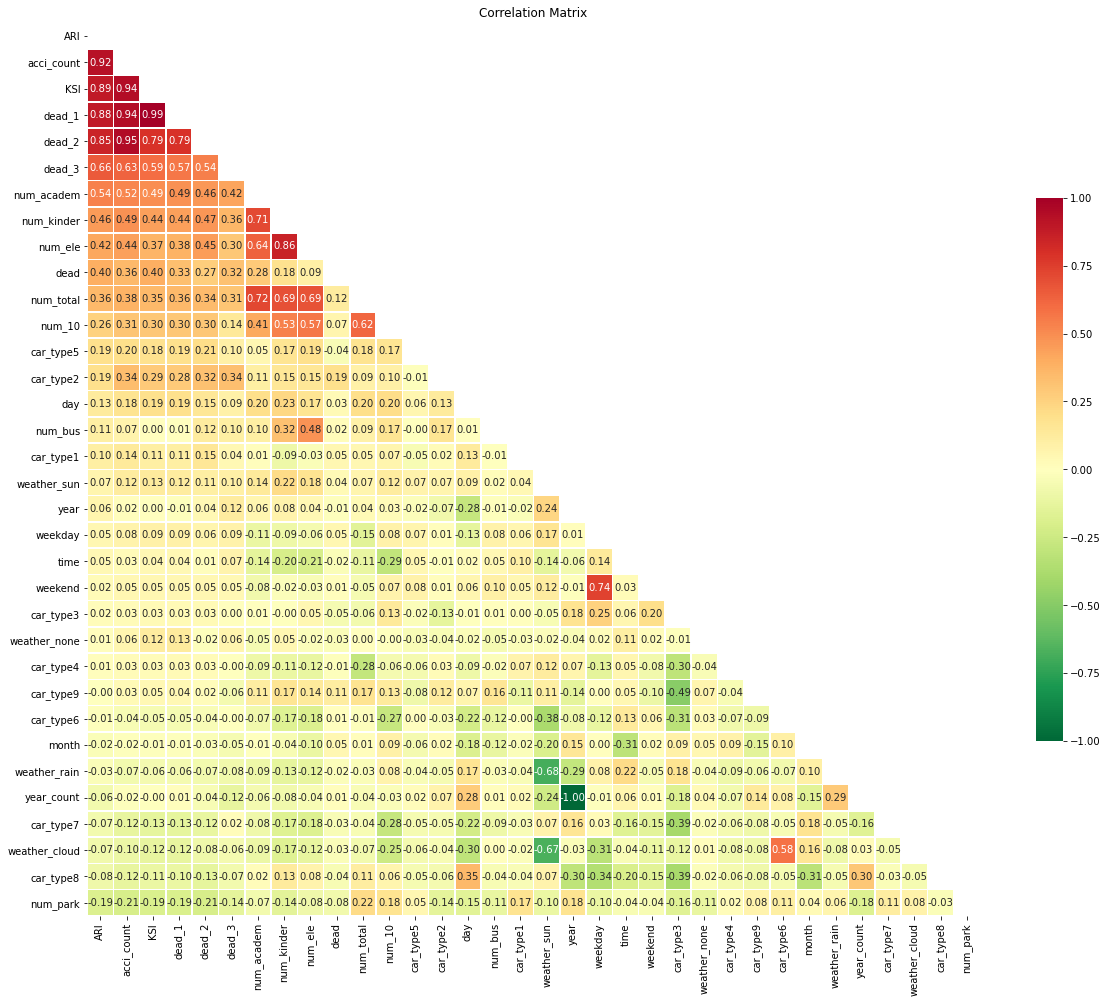

In [198]:
# 상관관계를 탐색할 변수 선택
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_cols = list(df.select_dtypes(include=numerics))
regular_temp = df[numeric_cols].copy()

# 상관관계 도출
corr_matrix = regular_temp.corr()
corr_matrix = corr_matrix.sort_values(by = 'ARI', axis = 0, ascending=False)
corr_matrix = corr_matrix[corr_matrix.index]

# 상관관계의 시각적 표현
f, ax = plt.subplots(figsize=(20, 20))
corr = regular_temp.select_dtypes(exclude=["object","bool"]).corr()

# 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

g = sns.heatmap(corr_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Correlation Matrix")

In [202]:
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
df.describe()

,dead,dead_1,dead_2,dead_3,acci_count,KSI,year,month,day,time,weekday,weekend,weather_none,weather_sun,weather_rain,weather_cloud,car_type1,car_type2,car_type3,car_type4,car_type5,car_type6,car_type7,car_type8,car_type9,num_10,num_park,num_ele,num_academ,num_kinder,num_total,num_bus,year_count,ARI
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.077778,3.944444,4.755556,0.466667,8.977778,4.055556,2014.944444,6.222222,14.711111,14.600000,2.775575,0.238437,0.000794,0.892944,0.056528,0.049734,0.005382,0.013397,0.740704,0.042936,0.013938,0.040509,0.023052,0.023850,0.096233,7.261727,1.188889,2.305556,50.911111,3.733333,9.879227,46.022222,5.732945,36.487880
std,0.308231,4.190307,5.317580,0.876664,9.382003,4.283129,1.718120,2.171200,5.119350,2.267504,1.222265,0.247645,0.007529,0.226345,0.168641,0.165483,0.022704,0.033488,0.287457,0.119673,0.044552,0.131150,0.148217,0.148406,0.183955,1.849206,1.108136,1.498491,45.362682,2.780550,0.680730,33.276245,1.654147,66.197716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.182839,4.000000,1.000000,0.125000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2014.000000,5.000000,12.000000,13.250000,2.133540,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.651961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.968773,0.000000,1.000000,18.000000,2.000000,9.387538,26.250000,5.000000,0.769231
50%,0.000000,2.000000,2.500000,0.000000,5.000000,2.000000,2015.000000,6.000000,15.000000,15.000000,2.904545,0.184659,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.805449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.666778,1.000000,2.000000,30.000000,3.000000,9.928278,35.000000,5.763889,5.005952
75%,0.000000,6.000000,7.000000,1.000000,14.000000,6.000000,2016.000000,7.000000,17.000000,16.000000,3.435268,0.377534,0.000000,1.000000,0.047078,0.000000,0.000000,0.000000,1.000000,0.053698,0.000000,0.014423,0.000000,0.000000,0.136555,8.396457,2.000000,3.000000,80.000000,5.000000,10.389149,56.000000,6.569197,44.388475
max,2.000000,19.000000,22.000000,5.000000,39.000000,20.000000,2020.000000,11.000000,27.000000,21.000000,6.000000,1.000000,0.071429,1.000000,1.000000,1.000000,0.166667,0.200000,1.000000,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,8.999619,3.000000,8.000000,202.000000,13.000000,11.111701,205.000000,9.000000,355.722824


In [329]:
#year, month, day, time int 변환
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['time'] = df['time'].astype(int)
df['weekday'] = df['weekday'].astype(int)
df['weekend'] = df['weekend'].astype(int)
df['weekday'] = df['weekday'].astype(int)

In [204]:
df.describe()

,dead,dead_1,dead_2,dead_3,acci_count,KSI,year,month,day,time,weekday,weekend,weather_none,weather_sun,weather_rain,weather_cloud,car_type1,car_type2,car_type3,car_type4,car_type5,car_type6,car_type7,car_type8,car_type9,num_10,num_park,num_ele,num_academ,num_kinder,num_total,num_bus,year_count,ARI
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.077778,3.944444,4.755556,0.466667,8.977778,4.055556,2014.944444,6.222222,14.711111,14.600000,2.444444,0.033333,0.000794,0.892944,0.056528,0.049734,0.005382,0.013397,0.740704,0.042936,0.013938,0.040509,0.023052,0.023850,0.096233,7.261727,1.188889,2.305556,50.911111,3.733333,9.879227,46.022222,5.732945,36.487880
std,0.308231,4.190307,5.317580,0.876664,9.382003,4.283129,1.718120,2.171200,5.119350,2.267504,1.218870,0.180511,0.007529,0.226345,0.168641,0.165483,0.022704,0.033488,0.287457,0.119673,0.044552,0.131150,0.148217,0.148406,0.183955,1.849206,1.108136,1.498491,45.362682,2.780550,0.680730,33.276245,1.654147,66.197716
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.182839,4.000000,1.000000,0.125000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2014.000000,5.000000,12.000000,13.250000,2.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.651961,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.968773,0.000000,1.000000,18.000000,2.000000,9.387538,26.250000,5.000000,0.769231
50%,0.000000,2.000000,2.500000,0.000000,5.000000,2.000000,2015.000000,6.000000,15.000000,15.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.805449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.666778,1.000000,2.000000,30.000000,3.000000,9.928278,35.000000,5.763889,5.005952
75%,0.000000,6.000000,7.000000,1.000000,14.000000,6.000000,2016.000000,7.000000,17.000000,16.000000,3.000000,0.000000,0.000000,1.000000,0.047078,0.000000,0.000000,0.000000,1.000000,0.053698,0.000000,0.014423,0.000000,0.000000,0.136555,8.396457,2.000000,3.000000,80.000000,5.000000,10.389149,56.000000,6.569197,44.388475
max,2.000000,19.000000,22.000000,5.000000,39.000000,20.000000,2020.000000,11.000000,27.000000,21.000000,6.000000,1.000000,0.071429,1.000000,1.000000,1.000000,0.166667,0.200000,1.000000,1.000000,0.333333,1.000000,1.000000,1.000000,1.000000,8.999619,3.000000,8.000000,202.000000,13.000000,11.111701,205.000000,9.000000,355.722824


In [330]:
#시간대별 변수 만들기
def is_time(x):
    if x < 7: 
        return 0
    elif x < 13 :
        return 1
    elif x < 19:
        return 2
    else:
        return 3 
    
df['time'] = df['time'].apply(is_time) 

<AxesSubplot:>

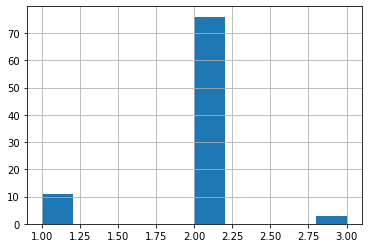

In [331]:
df['time'].hist()

In [332]:
df.to_csv('master_changwon_0927.csv')

# 모델 구축과 검증

In [207]:
#숫자형이 아닌 변수 제거

#문자 형태의 변수 추출
object_column = list(df.columns[df.dtypes =='object'])
#문자형 변수 제거
df = df.drop(object_column, axis = 'columns')

In [205]:
#분석에 필요없는 변수 제거
none_col= ['dead', 'dead_1', 'dead_2', 'dead_3', 'acci_count',
     'year_count','KSI']

df = df.drop(none_col, axis = 'columns')

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           90 non-null     int32  
 1   month          90 non-null     int32  
 2   day            90 non-null     int32  
 3   time           90 non-null     int32  
 4   weekday        90 non-null     int32  
 5   weekend        90 non-null     int32  
 6   weather_none   90 non-null     float64
 7   weather_sun    90 non-null     float64
 8   weather_rain   90 non-null     float64
 9   weather_cloud  90 non-null     float64
 10  car_type1      90 non-null     float64
 11  car_type2      90 non-null     float64
 12  car_type3      90 non-null     float64
 13  car_type4      90 non-null     float64
 14  car_type5      90 non-null     float64
 15  car_type6      90 non-null     float64
 16  car_type7      90 non-null     float64
 17  car_type8      90 non-null     float64
 18  car_type9   

In [233]:
df.shape

(90, 27)

In [234]:
data = df.drop('ARI', axis = 'columns')
label = df['ARI']

In [211]:
from sklearn.model_selection import train_test_split #데이터 분리

#데이터 셋 분리 
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state=11)

In [212]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [213]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 804583423.473
Ridge 로그 변환된 RMSE: 50.27
Lasso 로그 변환된 RMSE: 45.169


[804583423.4728767, 50.26991127772986, 45.169478986308846]

In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [215]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [216]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 2.221, RMSE: 804583423.473, MAE: 189642180.126


In [217]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

    real_count  predicted_count          diff
10   44.068184    -3.413558e+09  3.413558e+09
13   57.641026     1.850000e+02  1.273590e+02
17   25.000000     1.460000e+02  1.210000e+02
14    3.703704     1.090000e+02  1.052963e+02
11    0.727273     8.200000e+01  8.127273e+01


<AxesSubplot:>

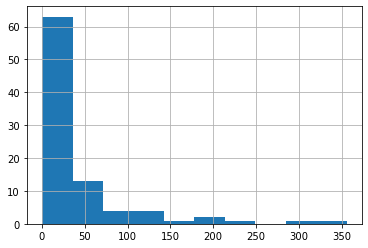

In [218]:
label.hist()

<AxesSubplot:>

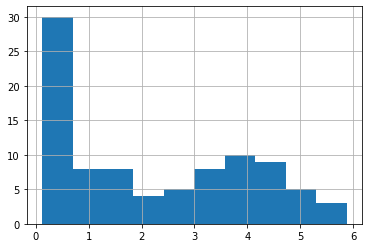

In [219]:
y_log_transform = np.log1p(label)
y_log_transform.hist()

In [220]:
# 타겟 컬럼인 count 값을 log1p 로 Log 변환
y_target_log = np.log1p(label)

# 로그 변환된 y_target_log를 반영하여 학습/테스트 데이터 셋 분할
X_train, X_test, y_train, y_test = train_test_split(data, y_target_log, test_size=0.2, random_state=11)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: inf, RMSE: 211.788, MAE: 75.405


<AxesSubplot:>

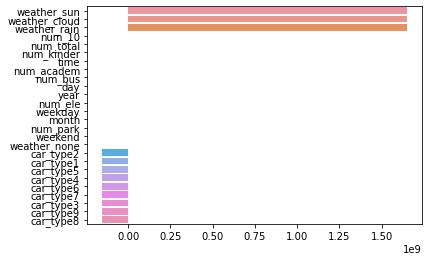

In [221]:
coef = pd.Series(lr_reg.coef_, index=data.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [222]:
# 'year', month', 'day', hour'등의 피처들을 One Hot Encoding
data_ohe = pd.get_dummies(data, columns=['year', 'month','day', 'time', 'weekday','weekend'])

In [223]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(data_ohe, y_target_log,
                                                    test_size=0.3, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 4.310, RMSE: 29955.119, MAE: 6357.623
### Ridge ###
RMSLE: 1.133, RMSE: 55.002, MAE: 30.003
### Lasso ###
RMSLE: 1.185, RMSE: 46.407, MAE: 26.641


<AxesSubplot:>

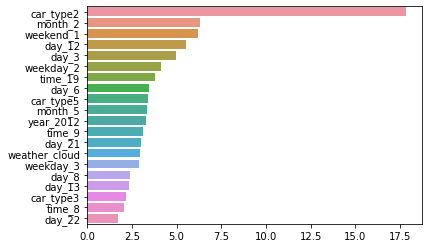

In [225]:
coef = pd.Series(lr_reg.coef_ , index=data_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

In [226]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.905, RMSE: 40.526, MAE: 23.256
### GradientBoostingRegressor ###
RMSLE: 0.980, RMSE: 30.498, MAE: 19.851
### XGBRegressor ###
RMSLE: 0.863, RMSE: 20.765, MAE: 13.707
### LGBMRegressor ###
RMSLE: 1.034, RMSE: 39.751, MAE: 22.216


# 주요변수만 넣어서 모델링

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           90 non-null     int32  
 1   month          90 non-null     int32  
 2   day            90 non-null     int32  
 3   time           90 non-null     int32  
 4   weekday        90 non-null     int32  
 5   weekend        90 non-null     int32  
 6   weather_none   90 non-null     float64
 7   weather_sun    90 non-null     float64
 8   weather_rain   90 non-null     float64
 9   weather_cloud  90 non-null     float64
 10  car_type1      90 non-null     float64
 11  car_type2      90 non-null     float64
 12  car_type3      90 non-null     float64
 13  car_type4      90 non-null     float64
 14  car_type5      90 non-null     float64
 15  car_type6      90 non-null     float64
 16  car_type7      90 non-null     float64
 17  car_type8      90 non-null     float64
 18  car_type9   

In [235]:
#분석에 필요없는 변수 제거
none_col= ['year','month','day']
data = data.drop(none_col, axis = 'columns')

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time           90 non-null     int32  
 1   weekday        90 non-null     int32  
 2   weekend        90 non-null     int32  
 3   weather_none   90 non-null     float64
 4   weather_sun    90 non-null     float64
 5   weather_rain   90 non-null     float64
 6   weather_cloud  90 non-null     float64
 7   car_type1      90 non-null     float64
 8   car_type2      90 non-null     float64
 9   car_type3      90 non-null     float64
 10  car_type4      90 non-null     float64
 11  car_type5      90 non-null     float64
 12  car_type6      90 non-null     float64
 13  car_type7      90 non-null     float64
 14  car_type8      90 non-null     float64
 15  car_type9      90 non-null     float64
 16  num_10         90 non-null     float64
 17  num_park       90 non-null     float64
 18  num_ele     

In [237]:
# 'time','weekend','weekday'등의 피처들을 One Hot Encoding
data_ohe = pd.get_dummies(data, columns=['time', 'weekday','weekend'])

In [240]:
# 원-핫 인코딩이 적용된 feature 데이터 세트 기반으로 학습/예측 데이터 분할. 
X_train, X_test, y_train, y_test = train_test_split(data_ohe, y_target_log,
                                                    test_size=0.2, random_state=0)

# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 30.696, RMSE: 86181254311695536740279480097396483179655902700679200768.000, MAE: 20313116444987432988829357619776368554539467019940528128.000
### Ridge ###
RMSLE: 1.333, RMSE: 58.375, MAE: 31.240
### Lasso ###
RMSLE: 1.365, RMSE: 56.704, MAE: 30.748


<AxesSubplot:>

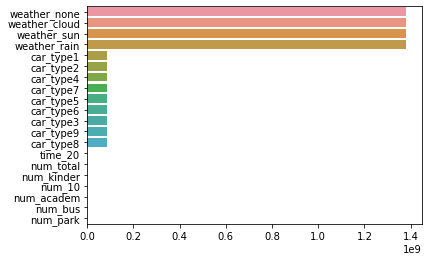

In [241]:
coef = pd.Series(lr_reg.coef_ , index=data_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values , y=coef_sort.index)

# 종속변수 KSI해서 다시

<AxesSubplot:>

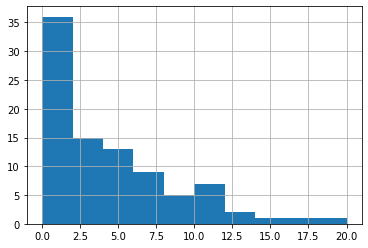

In [254]:
df['KSI'].hist()

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gun            90 non-null     object 
 1   dong           90 non-null     object 
 2   dead           90 non-null     int64  
 3   dead_1         90 non-null     int64  
 4   dead_2         90 non-null     int64  
 5   dead_3         90 non-null     int64  
 6   acci_count     90 non-null     int64  
 7   KSI            90 non-null     int64  
 8   year           90 non-null     int32  
 9   month          90 non-null     int32  
 10  day            90 non-null     int32  
 11  time           90 non-null     int32  
 12  weekday        90 non-null     int32  
 13  weekend        90 non-null     int32  
 14  weather_none   90 non-null     float64
 15  weather_sun    90 non-null     float64
 16  weather_rain   90 non-null     float64
 17  weather_cloud  90 non-null     float64
 18  car_type1   

In [271]:
#분석에 필요없는 변수 제거
none_col= ['gun','dong','dead', 'dead_1', 'dead_2', 'dead_3', 'acci_count',
     'year_count','ARI','year','month','day','weekday','time']

df2 = df.drop(none_col, axis = 'columns')

In [272]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KSI            90 non-null     int64  
 1   weekend        90 non-null     int32  
 2   weather_none   90 non-null     float64
 3   weather_sun    90 non-null     float64
 4   weather_rain   90 non-null     float64
 5   weather_cloud  90 non-null     float64
 6   car_type1      90 non-null     float64
 7   car_type2      90 non-null     float64
 8   car_type3      90 non-null     float64
 9   car_type4      90 non-null     float64
 10  car_type5      90 non-null     float64
 11  car_type6      90 non-null     float64
 12  car_type7      90 non-null     float64
 13  car_type8      90 non-null     float64
 14  car_type9      90 non-null     float64
 15  num_10         90 non-null     float64
 16  num_park       90 non-null     float64
 17  num_ele        90 non-null     float64
 18  num_academ  

In [265]:
# 'time','weekend','weekday'등의 피처들을 One Hot Encoding
df2 = pd.get_dummies(df2, columns=['time'])

In [273]:
data = df2.drop('KSI', axis = 'columns')
label = df['KSI']

<AxesSubplot:>

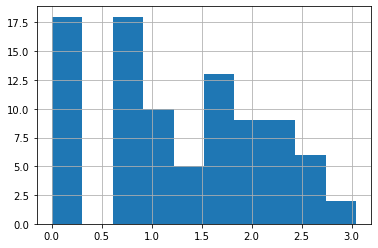

In [274]:
log_label = np.log1p(label)
log_label.hist()

In [275]:
#데이터 셋 분리 
X_train, X_test, y_train, y_test = train_test_split(data, log_label, test_size = 0.2, random_state=11)

In [276]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)
# end of function get_model_predict    

# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: inf, RMSE: 10.271, MAE: 4.873
### Ridge ###
RMSLE: 0.754, RMSE: 2.514, MAE: 1.983
### Lasso ###
RMSLE: 0.765, RMSE: 2.533, MAE: 2.023


In [278]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.579, RMSE: 2.157, MAE: 1.657
### GradientBoostingRegressor ###
RMSLE: 0.608, RMSE: 1.979, MAE: 1.618
### XGBRegressor ###
RMSLE: 0.491, RMSE: 1.542, MAE: 1.287
### LGBMRegressor ###
RMSLE: 0.666, RMSE: 2.395, MAE: 1.933


In [279]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=data.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

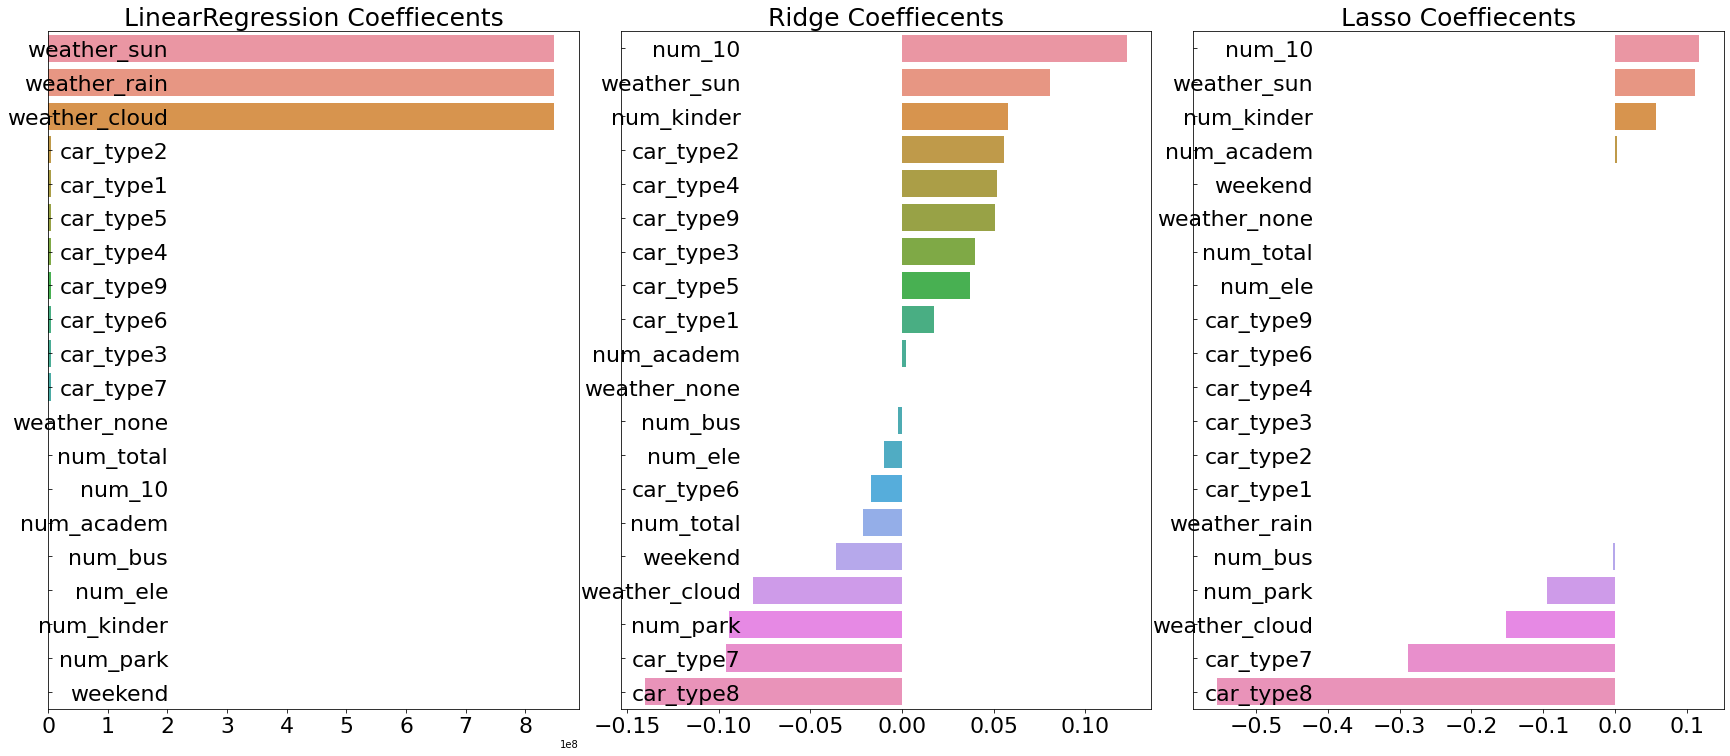

In [280]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [281]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score( ) 수행. 모델별 CV RMSE값과 평균 RMSE 출력
        rmse_list = np.sqrt(-cross_val_score(model, data, log_label,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [6.33200000e+00 1.97793018e+07 1.07300000e+00 1.84100000e+00
 9.81000000e-01]
LinearRegression CV 평균 RMSE 값: 3955862.399

Ridge CV RMSE 값 리스트: [0.645 0.796 1.    0.927 0.932]
Ridge CV 평균 RMSE 값: 0.86

Lasso CV RMSE 값 리스트: [0.648 0.814 1.041 0.983 0.931]
Lasso CV 평균 RMSE 값: 0.884


-  하이퍼파라미터 튜닝

In [282]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(data, log_label)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.8569, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.8461, 최적 alpha:{'alpha': 0.05}


LinearRegression 로그 변환된 RMSE: 0.569
Ridge 로그 변환된 RMSE: 0.691
Lasso 로그 변환된 RMSE: 0.699


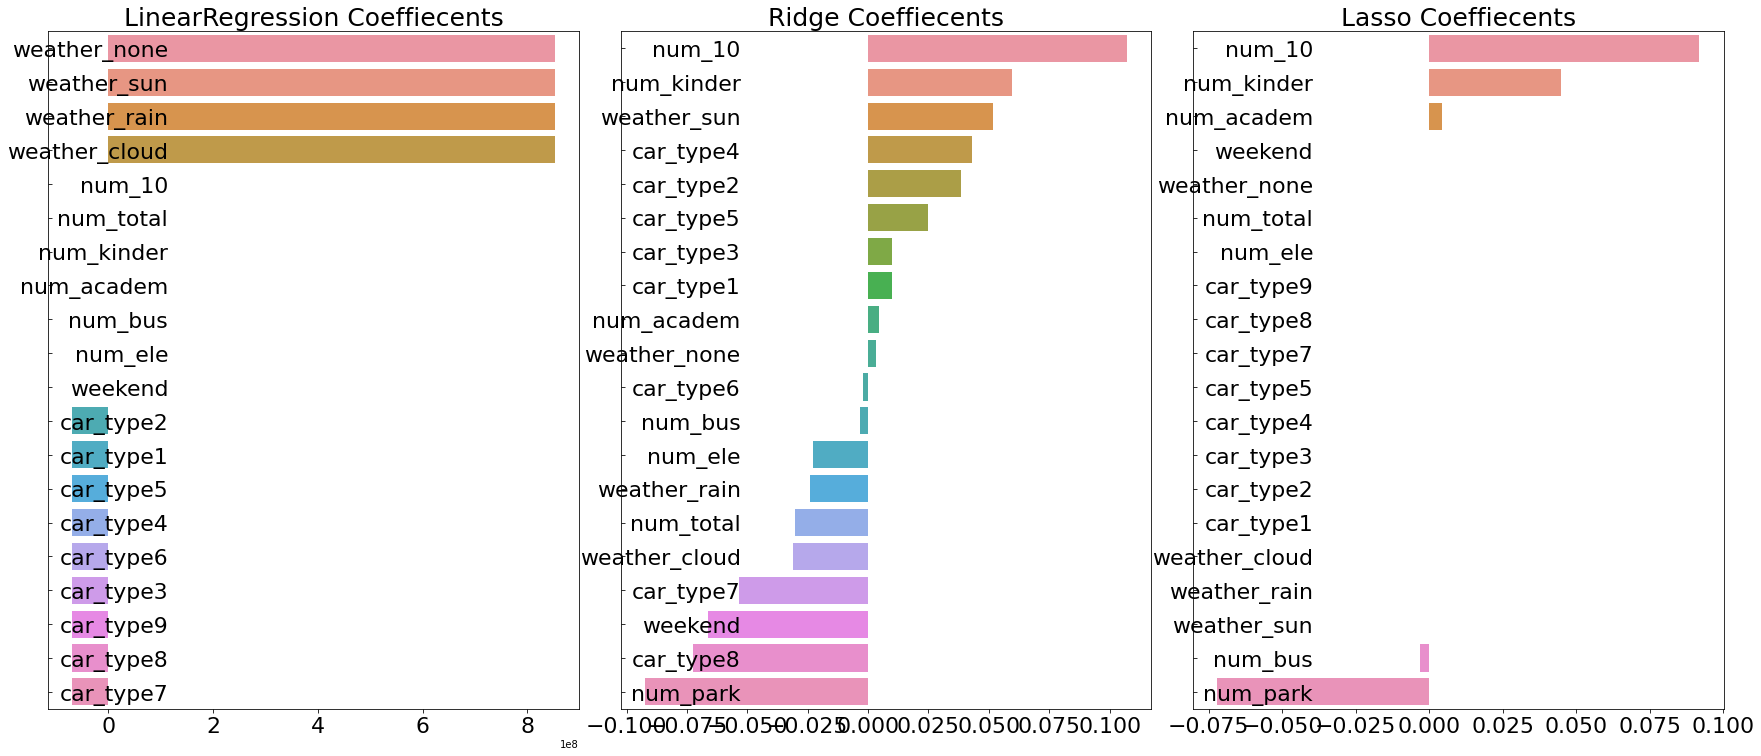

In [283]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(data, log_label)
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(data, log_label)
lasso_reg = Lasso(alpha=0.05)
lasso_reg.fit(data, log_label)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [289]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = df2.dtypes[df2.dtypes != 'object'].index
# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = df2[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

weather_none     9.327981
car_type7        6.467643
car_type8        6.427914
car_type4        6.055651
car_type6        5.417761
car_type1        5.273999
weekend          5.199469
car_type5        4.993657
weather_cloud    4.727853
weather_rain     4.415469
car_type2        3.127208
car_type9        3.052292
num_bus          2.142545
KSI              1.310124
num_academ       1.180980
num_kinder       1.058103
dtype: float64


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gun            90 non-null     object 
 1   dong           90 non-null     object 
 2   dead           90 non-null     int64  
 3   dead_1         90 non-null     int64  
 4   dead_2         90 non-null     int64  
 5   dead_3         90 non-null     int64  
 6   acci_count     90 non-null     int64  
 7   KSI            90 non-null     int64  
 8   year           90 non-null     int32  
 9   month          90 non-null     int32  
 10  day            90 non-null     int32  
 11  time           90 non-null     int32  
 12  weekday        90 non-null     int32  
 13  weekend        90 non-null     int32  
 14  weather_none   90 non-null     float64
 15  weather_sun    90 non-null     float64
 16  weather_rain   90 non-null     float64
 17  weather_cloud  90 non-null     float64
 18  car_type1   

In [299]:
#분석에 필요없는 변수 제거
none_col= ['gun','dong','dead', 'dead_1', 'dead_2', 'dead_3', 'acci_count',
     'year_count','ARI','year','month','day','weekday','weather_none']

df2 = df.drop(none_col, axis = 'columns')

### 시간변수 만들기

In [300]:
def is_time(x):
    if x < 7: 
        return 0
    elif x < 13 :
        return 1
    elif x < 19:
        return 2
    else:
        return 3 
    
df2['time'] = df2['time'].apply(is_time) 

In [301]:
df2[['time']].describe()

,time
count,90.000000
mean,1.911111
std,0.386411
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,3.000000


In [302]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   KSI            90 non-null     int64  
 1   time           90 non-null     int64  
 2   weekend        90 non-null     int32  
 3   weather_sun    90 non-null     float64
 4   weather_rain   90 non-null     float64
 5   weather_cloud  90 non-null     float64
 6   car_type1      90 non-null     float64
 7   car_type2      90 non-null     float64
 8   car_type3      90 non-null     float64
 9   car_type4      90 non-null     float64
 10  car_type5      90 non-null     float64
 11  car_type6      90 non-null     float64
 12  car_type7      90 non-null     float64
 13  car_type8      90 non-null     float64
 14  car_type9      90 non-null     float64
 15  num_10         90 non-null     float64
 16  num_park       90 non-null     float64
 17  num_ele        90 non-null     float64
 18  num_academ  

In [308]:
from scipy.stats import skew

# object가 아닌 숫자형 피쳐의 컬럼 index 객체 추출.
features_index = df2.dtypes[df2.dtypes != 'object'].index
# house_df에 컬럼 index를 [ ]로 입력하면 해당하는 컬럼 데이터 셋 반환. apply lambda로 skew( )호출 
skew_features = df2[features_index].apply(lambda x : skew(x))
# skew 정도가 1 이상인 컬럼들만 추출. 
skew_features_top = skew_features[(skew_features > 1) & (skew_features < 3)]
print(skew_features_top.sort_values(ascending=False))

num_bus       2.142545
KSI           1.310124
num_academ    1.180980
num_kinder    1.058103
dtype: float64


In [309]:
df2[skew_features_top.index] = np.log1p(df2[skew_features_top.index])

In [312]:
df2['time'] = pd.get_dummies(df2['time'])
y_target = df2['KSI']
X_features = df2.drop('KSI',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.8025, 최적 alpha:{'alpha': 1}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.8052, 최적 alpha:{'alpha': 0.001}


In [316]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(5)
    coef_low = coef.sort_values(ascending=False).tail(5)
    return coef_high, coef_low

In [317]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

LinearRegression 로그 변환된 RMSE: 1.014
Ridge 로그 변환된 RMSE: 0.891
Lasso 로그 변환된 RMSE: 0.993


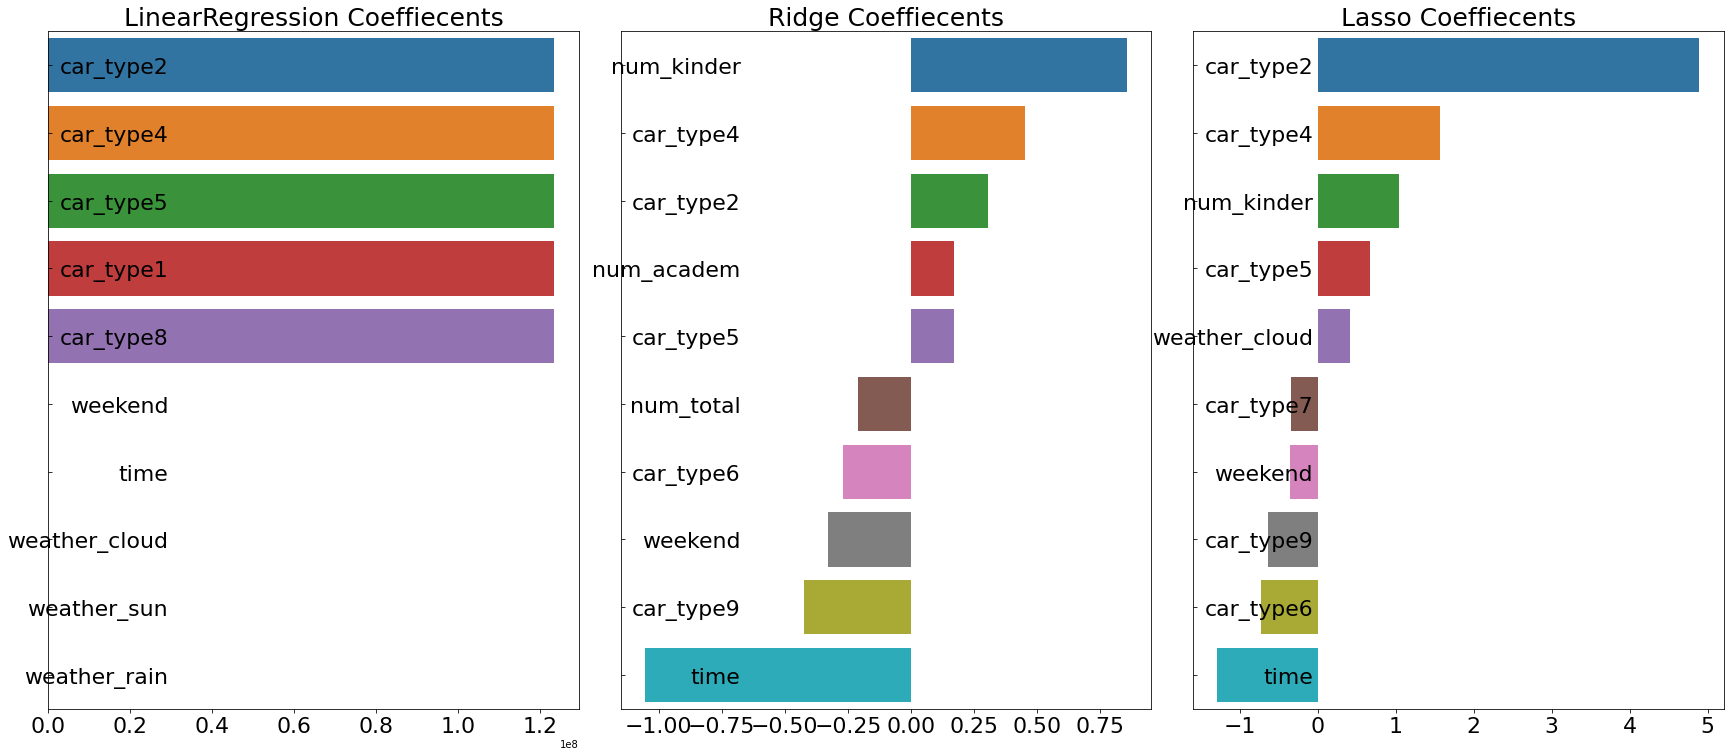

In [318]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)